In [1]:
import pandas as pd
import os

speeches = pd.read_csv('./all_ECB_speeches.csv', delimiter='|', error_bad_lines=False)
speeches.head()

,date,speakers,title,subtitle,contents
0,2021-05-27,Isabel Schnabel,Societal responsibility and central bank indep...,"Keynote speech by Isabel Schnabel, Member of t...",SPEECH Societal responsibility and central...
1,2021-05-27,Luis de Guindos,Climate change and financial integration,"Keynote speech by Luis de Guindos, Vice-Presid...",SPEECH Climate change and financial integr...
2,2021-05-25,Philip R. Lane,The ECB strategy review,"Presentation by Philip R. Lane, Member of the ...",NaN
3,2021-05-19,Fabio Panetta,At the edge of tomorrow: preparing the future ...,"Introductory remarks by Fabio Panetta, Member ...",SPEECH At the edge of tomorrow: preparing ...
4,2021-05-06,Christine Lagarde,Towards a green capital markets union for Europe,"Speech by Christine Lagarde, President of the ...",SPEECH Towards a green capital markets uni...


In [2]:
speeches.iloc[0]

date                                               2021-05-27
speakers                                      Isabel Schnabel
title       Societal responsibility and central bank indep...
subtitle    Keynote speech by Isabel Schnabel, Member of t...
contents       SPEECH  Societal responsibility and central...
Name: 0, dtype: object

In [3]:
speeches.columns

Index(['date', 'speakers', 'title', 'subtitle', 'contents'], dtype='object')

In [4]:
# clean the columns (date, title, subtitle, speaker)
sample_size = 10

#speeches = speeches.drop(columns=['date', 'speakers', 'title', 'subtitle'], axis=1).sample(sample_size)

speeches = speeches.drop(columns=['date', 'speakers', 'title', 'subtitle'], axis=1).iloc[300:620]
speeches.head()

,contents
300,Most recent ECB monetary policy decisions ...
301,The future of financial market infrastructur...
302,Monetary policy in the euro area Speech by...
303,NaN
304,Central bank risk management in times of mon...


In [5]:
data = list(speeches['contents'])
data = [str(docs) for docs in data]

In [6]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer



# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# stop_words = stopwords.words('english')
# lemmatizer = WordNetLemmatizer()
# words = set(nltk.corpus.words.words())

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# def remove_non_english(texts):
#     return [[w for w in nltk.wordpunct_tokenize(" ".join(doc)) if w.lower() in words or not w.isalpha()] for doc in texts]

# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]

# def lemmatize(texts):
#     return [[lemmatizer.lemmatize(w) for w in doc] for doc in texts]



# # tokenize remove stopword, remove non english, punctuations, lemmatize

# data = speeches.contents.values.tolist()
# data_words = list(sent_to_words(data))

# data_words = remove_non_english(data_words)
# data_words = lemmatize(data_words)

# data_words = remove_stopwords(data_words)
# data = [" ".join(doc) for doc in data_words]

# print(data_words[:1][0][:30])

In [7]:
from top2vec import Top2Vec

model = Top2Vec(data, embedding_model='distiluse-base-multilingual-cased')

2021-06-25 20:58:04,776 - top2vec - INFO - Pre-processing documents for training
2021-06-25 20:58:06,927 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2021-06-25 20:58:08,666 - top2vec - INFO - Creating joint document/word embedding
2021-06-25 20:58:12,042 - top2vec - INFO - Creating lower dimension embedding of documents
2021-06-25 20:58:18,010 - top2vec - INFO - Finding dense areas of documents
2021-06-25 20:58:18,018 - top2vec - INFO - Finding topics


In [8]:
model.get_num_topics()

3

In [9]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [10]:
topic_words, word_scores, topic_nums = model.get_topics(2)

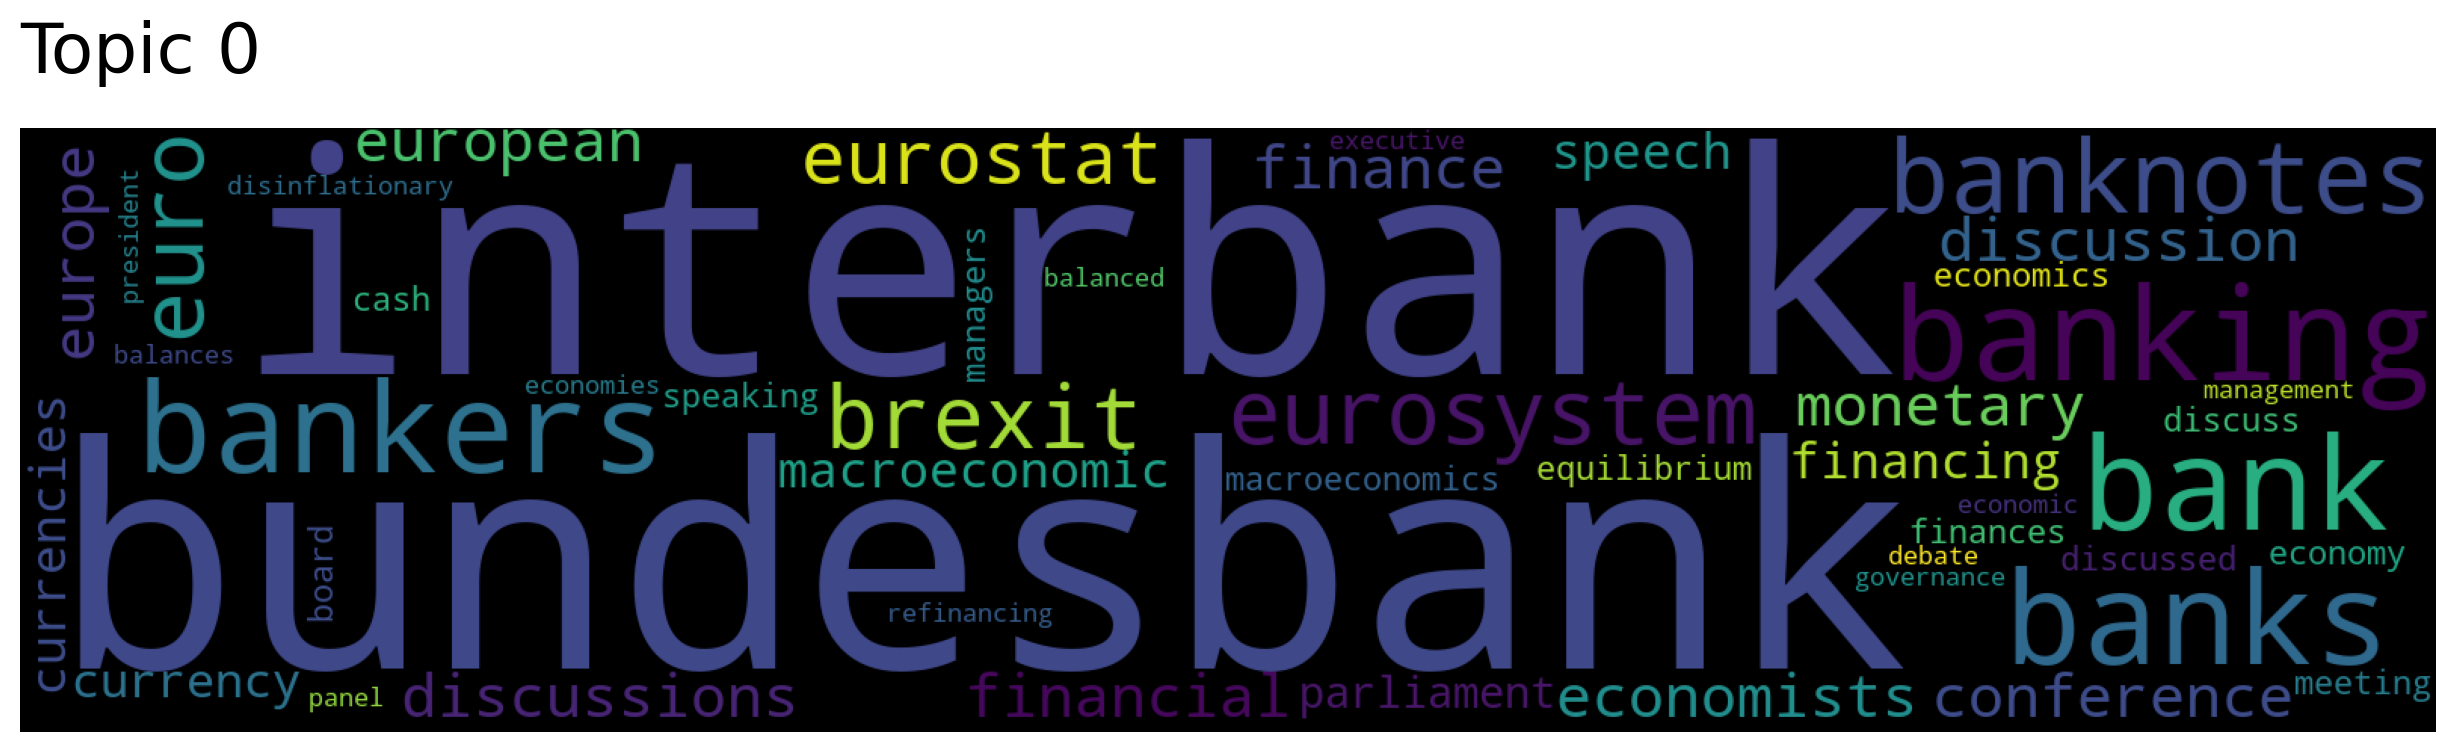

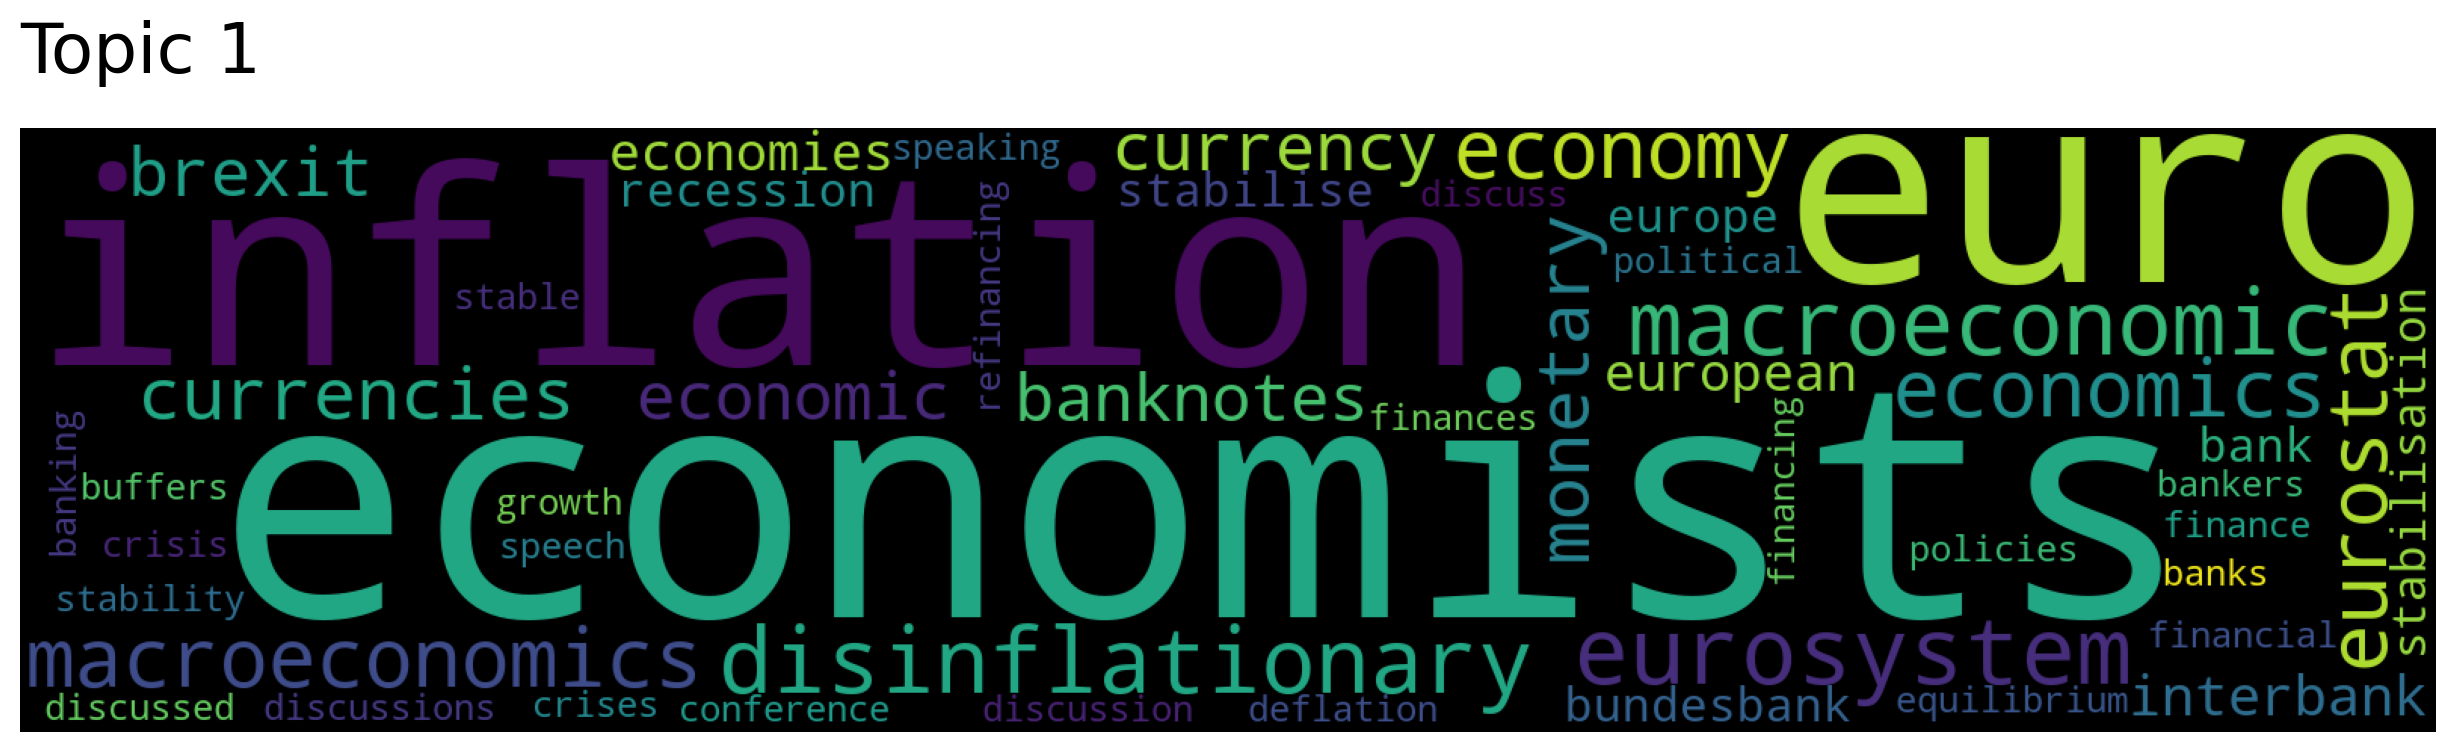

In [11]:
for topic in topic_nums:
    
    model.generate_topic_wordcloud(topic)

In [12]:
for i in range(len(topic_nums)):
    print("Topic ", i, ": ")
    for index, (word, score) in enumerate(zip(topic_words[i], word_scores[i])):
        print(word+ ": ",score)
        if (index == 10):
            break
    print()

Topic  0 : 
bundesbank:  0.33192223
interbank:  0.33087757
banking:  0.30049592
bank:  0.29774284
banks:  0.28967822
bankers:  0.2588836
banknotes:  0.2581691
eurosystem:  0.23327565
euro:  0.182921
brexit:  0.17251572
eurostat:  0.16990986

Topic  1 : 
economists:  0.23386183
inflation:  0.23265234
euro:  0.23171493
eurosystem:  0.22667775
disinflationary:  0.22533682
macroeconomic:  0.2110521
macroeconomics:  0.20129353
eurostat:  0.18996899
economy:  0.1875503
economics:  0.18263525
currencies:  0.18021564

